<font color="red" size=6>***In this project, I am creating the connection between mysql and python and then I will be performing some tasks in python***</font>

In [1]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

<font color="red">***We are now making the connection with the database using pymysql.***</font>

In [2]:
conn = pymysql.connect(host="localhost", port=int(3306), user="root", passwd="root", db="fmgc_product")
CursorInstance = conn.cursor()
CursorInstance.execute("show tables")
for (i,) in CursorInstance:
    print(i)

dim_customers
dim_date
dim_products
dim_targets_orders
fact_order_lines


In [3]:
query = "SELECT * FROM dim_customers"
CursorInstance.execute(query)
dim_customer = []
for (customer_id, customer_name, city) in CursorInstance:
    dim_customer.append({"customer_id" : customer_id,
                        "customer_name" : customer_name,
                        "city" : city})
df_dim_customer = pd.DataFrame(dim_customer)
df_dim_customer.head()

,customer_id,customer_name,city
0,789201,Rel Fresh,Surat
1,789202,Rel Fresh,Ahmedabad
2,789203,Rel Fresh,Vadodara
3,789301,Expression Stores,Surat
4,789303,Expression Stores,Vadodara


In [4]:
df_dim_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    35 non-null     int64 
 1   customer_name  35 non-null     object
 2   city           35 non-null     object
dtypes: int64(1), object(2)
memory usage: 972.0+ bytes


In [5]:
df_dim_date = pd.read_sql_query("SELECT * FROM dim_date", conn)
df_dim_date.head()

C:\Users\HP'\AppData\Local\Temp\ipykernel_1560\982415016.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_dim_date = pd.read_sql_query("SELECT * FROM dim_date", conn)


,date,mmm_yy,week_no
0,01-Apr-22,01-Apr-22,W 14
1,03-Apr-22,01-Apr-22,W 15
2,04-Apr-22,01-Apr-22,W 15
3,05-Apr-22,01-Apr-22,W 15
4,06-Apr-22,01-Apr-22,W 15


In [6]:
df_dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     183 non-null    object
 1   mmm_yy   183 non-null    object
 2   week_no  183 non-null    object
dtypes: object(3)
memory usage: 4.4+ KB


In [7]:
df_dim_date[["date","mmm_yy"]]=df_dim_date[["date","mmm_yy"]].apply(pd.to_datetime)

C:\Users\HP'\AppData\Local\Temp\ipykernel_1560\2638168915.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_dim_date[["date","mmm_yy"]]=df_dim_date[["date","mmm_yy"]].apply(pd.to_datetime)
C:\Users\HP'\AppData\Local\Temp\ipykernel_1560\2638168915.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_dim_date[["date","mmm_yy"]]=df_dim_date[["date","mmm_yy"]].apply(pd.to_datetime)


In [8]:
df_dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     183 non-null    datetime64[ns]
 1   mmm_yy   183 non-null    datetime64[ns]
 2   week_no  183 non-null    object        
dtypes: datetime64[ns](2), object(1)
memory usage: 4.4+ KB


In [9]:
df_dim_products = pd.read_sql_query("SELECT * FROM dim_products", conn)
df_dim_products.head()

C:\Users\HP'\AppData\Local\Temp\ipykernel_1560\23670484.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_dim_products = pd.read_sql_query("SELECT * FROM dim_products", conn)


,product_name,product_id,category
0,AM Milk 500,25891101,Dairy
1,AM Milk 250,25891102,Dairy
2,AM Milk 100,25891103,Dairy
3,AM Butter 100,25891201,Dairy
4,AM Butter 250,25891202,Dairy


In [10]:
df_dim_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  18 non-null     object
 1   product_id    18 non-null     int64 
 2   category      18 non-null     object
dtypes: int64(1), object(2)
memory usage: 564.0+ bytes


In [11]:
df_dim_targets_orders = pd.read_sql_query("SELECT * FROM dim_targets_orders", conn)
df_dim_targets_orders.head()

C:\Users\HP'\AppData\Local\Temp\ipykernel_1560\3988268292.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_dim_targets_orders = pd.read_sql_query("SELECT * FROM dim_targets_orders", conn)


,customer_id,ontime_target%,infull_target%,otif_target%
0,789201,87,81,70
1,789202,85,81,69
2,789203,92,76,70
3,789301,89,78,69
4,789303,88,78,69


In [12]:
df_dim_targets_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     35 non-null     int64
 1   ontime_target%  35 non-null     int64
 2   infull_target%  35 non-null     int64
 3   otif_target%    35 non-null     int64
dtypes: int64(4)
memory usage: 1.2 KB


In [13]:
df_fact_order_lines = pd.read_sql_query("SELECT * FROM fact_order_lines", conn)
df_fact_order_lines.head()

C:\Users\HP'\AppData\Local\Temp\ipykernel_1560\184214461.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_fact_order_lines = pd.read_sql_query("SELECT * FROM fact_order_lines", conn)


,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full
0,FMR34203601,"Tuesday, March 1, 2022",789203,25891601,110,"Friday, March 4, 2022","Friday, March 4, 2022",110,1,1,1
1,FMR32320302,"Tuesday, March 1, 2022",789320,25891203,347,"Wednesday, March 2, 2022","Wednesday, March 2, 2022",347,1,1,1
2,FMR33320501,"Tuesday, March 1, 2022",789320,25891203,187,"Thursday, March 3, 2022","Thursday, March 3, 2022",150,0,1,0
3,FMR34220601,"Tuesday, March 1, 2022",789220,25891203,235,"Friday, March 4, 2022","Friday, March 4, 2022",235,1,1,1
4,FMR33703603,"Tuesday, March 1, 2022",789703,25891203,176,"Thursday, March 3, 2022","Thursday, March 3, 2022",176,1,1,1


In [14]:
df_fact_order_lines[["order_placement_date", "actual_delivery_date"]] = df_fact_order_lines[["order_placement_date", "actual_delivery_date"]].apply(pd.to_datetime)

In [15]:
df_fact_order_lines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57096 entries, 0 to 57095
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              57096 non-null  object        
 1   order_placement_date  57096 non-null  datetime64[ns]
 2   customer_id           57096 non-null  int64         
 3   product_id            57096 non-null  int64         
 4   order_qty             57096 non-null  int64         
 5   agreed_delivery_date  57096 non-null  object        
 6   actual_delivery_date  57096 non-null  datetime64[ns]
 7   delivery_qty          57096 non-null  int64         
 8   In Full               57096 non-null  int64         
 9   On Time               57096 non-null  int64         
 10  On Time In Full       57096 non-null  int64         
dtypes: datetime64[ns](2), int64(7), object(2)
memory usage: 4.8+ MB


In [16]:
df_fact_order_lines.isnull().sum()

order_id                0
order_placement_date    0
customer_id             0
product_id              0
order_qty               0
agreed_delivery_date    0
actual_delivery_date    0
delivery_qty            0
In Full                 0
On Time                 0
On Time In Full         0
dtype: int64

In [17]:
df_fact_order_lines.head()

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full
0,FMR34203601,2022-03-01,789203,25891601,110,"Friday, March 4, 2022",2022-03-04,110,1,1,1
1,FMR32320302,2022-03-01,789320,25891203,347,"Wednesday, March 2, 2022",2022-03-02,347,1,1,1
2,FMR33320501,2022-03-01,789320,25891203,187,"Thursday, March 3, 2022",2022-03-03,150,0,1,0
3,FMR34220601,2022-03-01,789220,25891203,235,"Friday, March 4, 2022",2022-03-04,235,1,1,1
4,FMR33703603,2022-03-01,789703,25891203,176,"Thursday, March 3, 2022",2022-03-03,176,1,1,1


In [18]:
df_fact_order_lines.isnull().sum()

order_id                0
order_placement_date    0
customer_id             0
product_id              0
order_qty               0
agreed_delivery_date    0
actual_delivery_date    0
delivery_qty            0
In Full                 0
On Time                 0
On Time In Full         0
dtype: int64

In [19]:
df_fact_order_lines = df_fact_order_lines.merge(df_dim_targets_orders, on="customer_id")

In [20]:
df_fact_order_lines = df_fact_order_lines.merge(df_dim_products, on="product_id")

In [21]:
df_fact_order_lines.head()

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full,ontime_target%,infull_target%,otif_target%,product_name,category
0,FMR34203601,2022-03-01,789203,25891601,110,"Friday, March 4, 2022",2022-03-04,110,1,1,1,92,76,70,AM Tea 500,beverages
1,FMR35203601,2022-03-02,789203,25891601,55,"Saturday, March 5, 2022",2022-03-05,55,1,1,1,92,76,70,AM Tea 500,beverages
2,FMR39203601,2022-03-06,789203,25891601,102,"Wednesday, March 9, 2022",2022-03-09,102,1,1,1,92,76,70,AM Tea 500,beverages
3,FMR310203601,2022-03-09,789203,25891601,189,"Thursday, March 10, 2022",2022-03-10,180,0,1,0,92,76,70,AM Tea 500,beverages
4,FMR311203603,2022-03-10,789203,25891601,70,"Friday, March 11, 2022",2022-03-11,70,1,1,1,92,76,70,AM Tea 500,beverages


In [22]:
df_fact_order_lines = df_fact_order_lines.merge(df_dim_date, left_on="order_placement_date", right_on="date")

In [23]:
df_fact_order_lines.head(2)

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full,ontime_target%,infull_target%,otif_target%,product_name,category,date,mmm_yy,week_no
0,FMR34203601,2022-03-01,789203,25891601,110,"Friday, March 4, 2022",2022-03-04,110,1,1,1,92,76,70,AM Tea 500,beverages,2022-03-01,2022-03-01,W 10
1,FMR34220601,2022-03-01,789220,25891601,78,"Friday, March 4, 2022",2022-03-04,78,1,1,1,91,76,69,AM Tea 500,beverages,2022-03-01,2022-03-01,W 10


In [24]:
df_fact_order_lines = df_fact_order_lines.merge(df_dim_customer, on="customer_id")

In [25]:
df_fact_order_lines.head(2)
pd.set_option("display.max_columns", None)

In [26]:
df_fact_order_lines.head(2)

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full,ontime_target%,infull_target%,otif_target%,product_name,category,date,mmm_yy,week_no,customer_name,city
0,FMR34203601,2022-03-01,789203,25891601,110,"Friday, March 4, 2022",2022-03-04,110,1,1,1,92,76,70,AM Tea 500,beverages,2022-03-01,2022-03-01,W 10,Rel Fresh,Vadodara
1,FMR34203601,2022-03-01,789203,25891301,100,"Friday, March 4, 2022",2022-03-04,100,1,1,1,92,76,70,AM Ghee 250,Dairy,2022-03-01,2022-03-01,W 10,Rel Fresh,Vadodara


Adding underscore in the columns names

In [27]:
df_fact_order_lines.columns = df_fact_order_lines.columns.str.replace(" ", "_")

In [28]:
df_fact_order_lines.head(2)

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In_Full,On_Time,On_Time_In_Full,ontime_target%,infull_target%,otif_target%,product_name,category,date,mmm_yy,week_no,customer_name,city
0,FMR34203601,2022-03-01,789203,25891601,110,"Friday, March 4, 2022",2022-03-04,110,1,1,1,92,76,70,AM Tea 500,beverages,2022-03-01,2022-03-01,W 10,Rel Fresh,Vadodara
1,FMR34203601,2022-03-01,789203,25891301,100,"Friday, March 4, 2022",2022-03-04,100,1,1,1,92,76,70,AM Ghee 250,Dairy,2022-03-01,2022-03-01,W 10,Rel Fresh,Vadodara


In [29]:
df_fact_order_lines["agreed_delivery_date"] = pd.to_datetime(df_fact_order_lines["agreed_delivery_date"])

In [30]:
df_fact_order_lines.head(2)

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In_Full,On_Time,On_Time_In_Full,ontime_target%,infull_target%,otif_target%,product_name,category,date,mmm_yy,week_no,customer_name,city
0,FMR34203601,2022-03-01,789203,25891601,110,2022-03-04,2022-03-04,110,1,1,1,92,76,70,AM Tea 500,beverages,2022-03-01,2022-03-01,W 10,Rel Fresh,Vadodara
1,FMR34203601,2022-03-01,789203,25891301,100,2022-03-04,2022-03-04,100,1,1,1,92,76,70,AM Ghee 250,Dairy,2022-03-01,2022-03-01,W 10,Rel Fresh,Vadodara


<Axes: title={'center': 'Orders by cities'}, xlabel='City', ylabel='Total order count'>

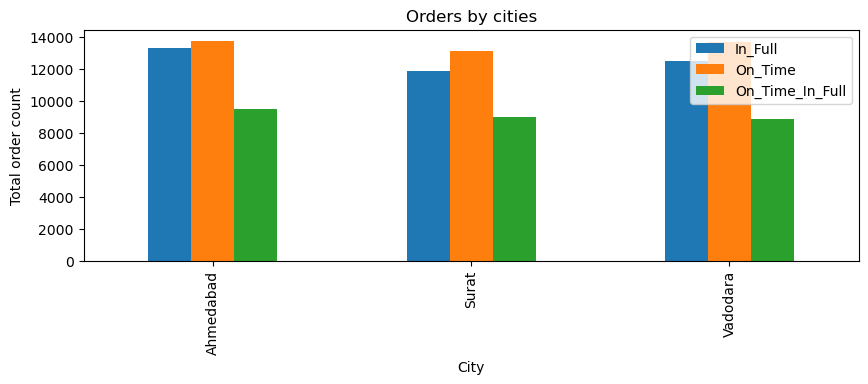

In [31]:
df_fact_order_lines.groupby("city")[["In_Full", "On_Time", "On_Time_In_Full"]].sum().plot(kind="bar", 
                                                                                          xlabel="City", 
                                                                                          ylabel="Total order count", 
                                                                                          title="Orders by cities",
                                                                                          figsize=(10, 3))

In [32]:
df_city_pct = df_fact_order_lines.groupby("city")[["ontime_target%", "otif_target%", "otif_target%"]].mean().round(2)
df_city_pct

,ontime_target%,otif_target%,otif_target%
city,,,
Ahmedabad,85.84,66.54,66.54
Surat,86.28,66.38,66.38
Vadodara,86.18,64.89,64.89


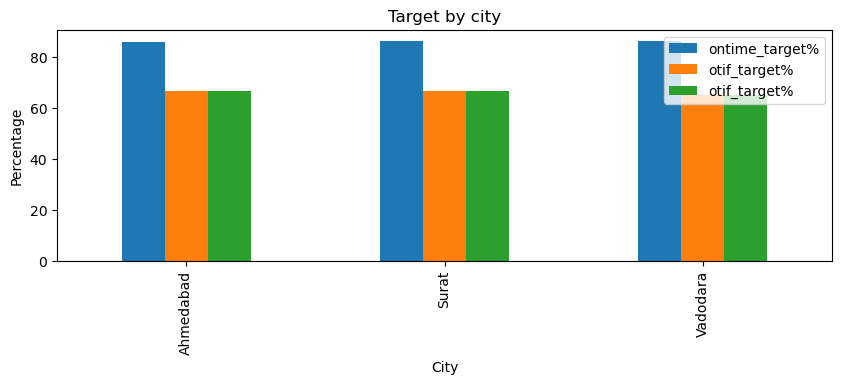

In [33]:
df_city_pct.plot(kind="bar", 
                 xlabel="City", 
                 ylabel="Percentage", 
                 title="Target by city",
                 figsize=(10,3))
plt.show()

[]

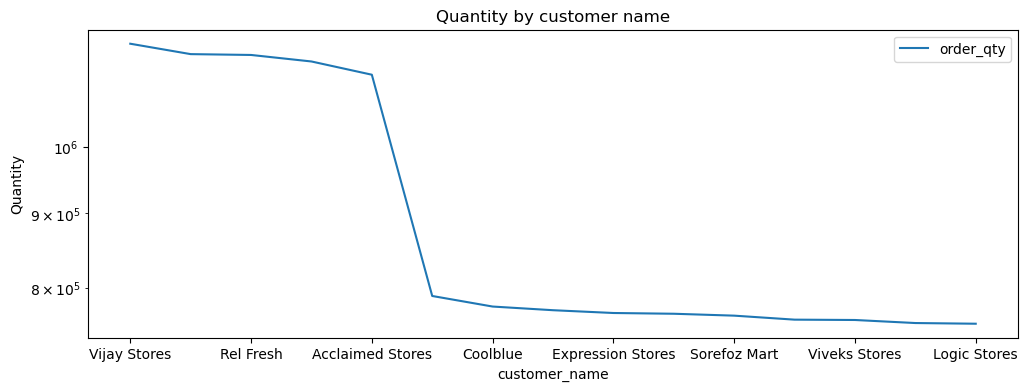

In [34]:
df_fact_order_lines.groupby("customer_name")[["order_qty"]].sum().sort_values(by="order_qty", 
                                                                              ascending=False).plot(figsize=(12,4), 
                                                                                                    ylabel="Quantity", 
                                                                                                    logy=True,
                                                                                                    title="Quantity by customer name")
plt.plot()

In [35]:
df_fact_order_lines.groupby(["category"])[["order_qty", "delivery_qty"]].sum()

,order_qty,delivery_qty
category,,
Dairy,10564711,10204241
Food,1678481,1622094
beverages,1183744,1142822


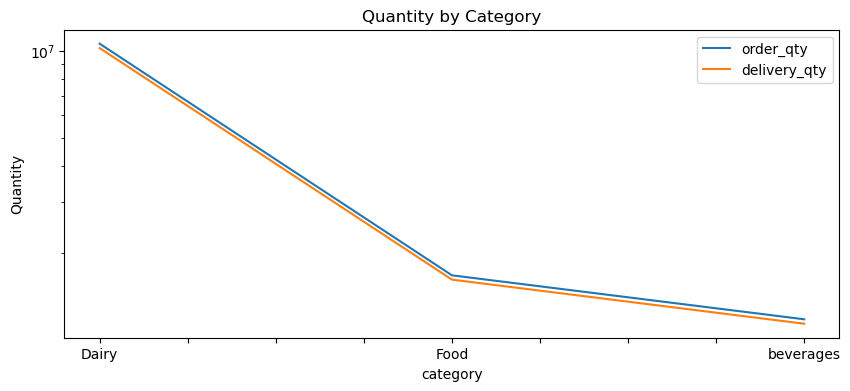

In [36]:
df_fact_order_lines.groupby(["category"])[["order_qty", "delivery_qty"]].sum().plot(ylabel="Quantity", 
                                                                                    logy=True, 
                                                                                    figsize=(10,4), 
                                                                                    title="Quantity by Category"
                                                                                    )
plt.show()

<font color="red">***I want to know that how many orders are made and out of that how many are delivered by the category of food***</font>

In [37]:
import datetime as dt 
df_fact_order_lines[(df_fact_order_lines["order_placement_date"].dt.day_name()=="Saturday") | (df_fact_order_lines["order_placement_date"].dt.day_name()=="Sunday")].groupby("category")[["order_qty", "delivery_qty"]].sum()

,order_qty,delivery_qty
category,,
Dairy,3046319,2942381
Food,480752,464109
beverages,328199,317135


In [39]:
df_fact_order_lines[(df_fact_order_lines["order_placement_date"].dt.day_name()!="Saturday") | (df_fact_order_lines["order_placement_date"].dt.day_name()!="Sunday")].groupby("category")[["order_qty", "delivery_qty"]].sum()

,order_qty,delivery_qty
category,,
Dairy,10564711,10204241
Food,1678481,1622094
beverages,1183744,1142822


<font color=red>***Now, we want to know that which city has placed the highest orders and how many orders orders hve been delivered***</font>

In [41]:
df_fact_order_lines.groupby("city")[["order_qty", "delivery_qty"]].sum()

,order_qty,delivery_qty
city,,
Ahmedabad,4612298,4462984
Surat,4190467,4050082
Vadodara,4624171,4456091


In [50]:
df_fact_order_lines.groupby("week_no")[["In_Full","On_Time","On_Time_In_Full","order_qty", "delivery_qty"]].sum()

,In_Full,On_Time,On_Time_In_Full,order_qty,delivery_qty
week_no,,,,,
W 10,1011,1160,752,369978,357363
W 11,1492,1544,1056,519367,501474
W 12,1465,1592,1090,522608,504964
W 13,1415,1544,1021,506771,489664
W 14,1444,1561,1058,513167,495894
W 15,1457,1541,1052,503411,487266
W 16,1450,1597,1068,521032,503119
W 17,1440,1598,1043,523220,504555
W 18,1431,1545,1033,510940,493237


From the above code, we came to know that orders which are on time and full are much lesser than the ordered quamtity.

<font color=red>***Now, we want to know the ordered quamtity and delivery quantity by month***</font>

In [53]:
df_fact_order_lines["month"]=df_fact_order_lines["order_placement_date"].dt.month_name()

In [56]:
df_fact_order_lines.groupby("month")[["order_qty", "delivery_qty"]].sum().sort_values(by="order_qty", ascending=False)

,order_qty,delivery_qty
month,,
May,2298831,2220444
March,2289498,2211756
July,2279870,2202316
April,2200996,2125780
June,2196371,2119661
August,2161370,2089200


In [64]:
df_fact_order_lines[df_fact_order_lines["otif_target%"]>=70].groupby("city")[["ontime_target%", "infull_target%", "otif_target%"]].mean()

,ontime_target%,infull_target%,otif_target%
city,,,
Ahmedabad,89.615797,80.798025,72.413823
Surat,89.987747,80.673936,72.661682
Vadodara,89.313904,79.027322,70.675167


[Text(0.5, 1.0, 'On-time delivery VS in-full delivery by cities')]

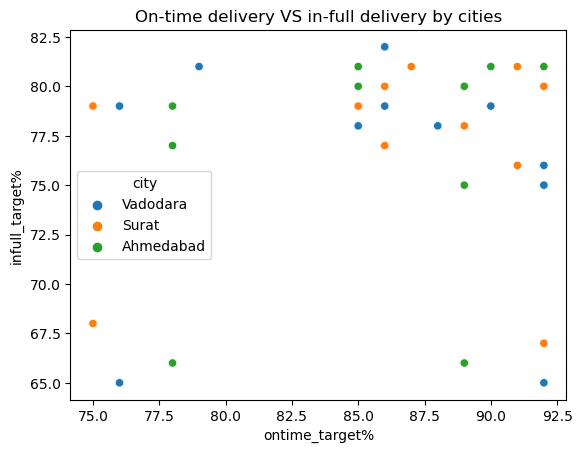

In [69]:
ax = sns.scatterplot(x="ontime_target%", y="infull_target%", data=df_fact_order_lines,hue="city")
ax.set(title="On-time delivery VS in-full delivery by cities")

c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


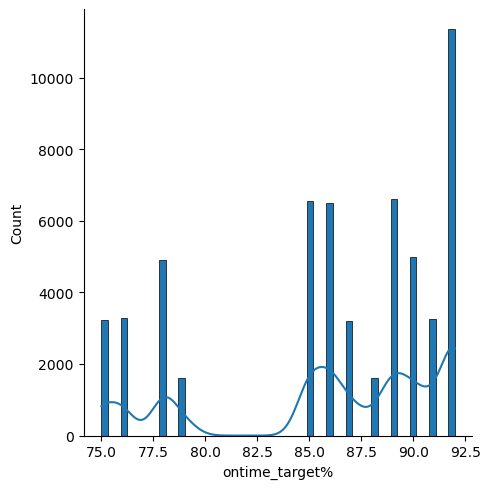

In [79]:
sns.displot(x="ontime_target%",data=df_fact_order_lines, kde=True, alpha=1)

c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


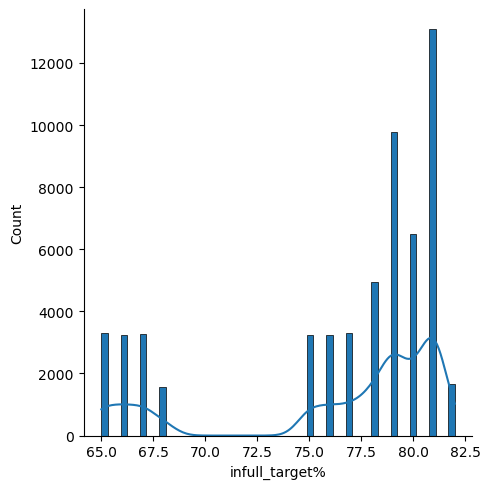

In [78]:
sns.displot(x="infull_target%",data=df_fact_order_lines, kde=True, alpha=1) 

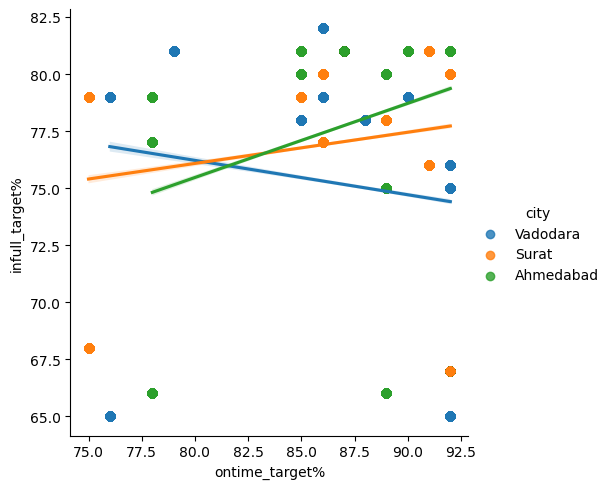

In [82]:
sns.lmplot(x="ontime_target%", y="infull_target%", data=df_fact_order_lines,hue="city")

[Text(0.5, 1.0, 'OTIF target VS Category by Category')]

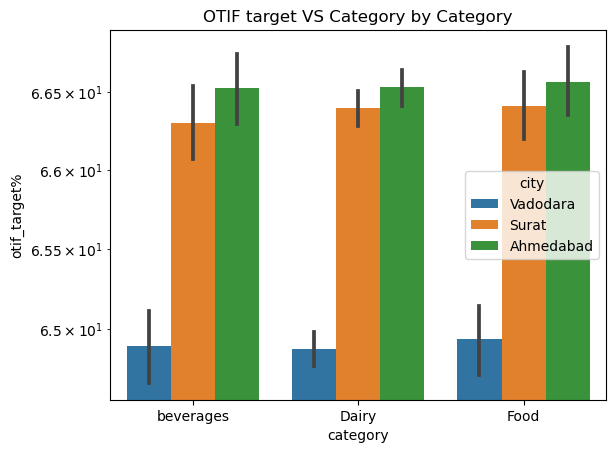

In [93]:
ax = sns.barplot(x="category", y="otif_target%", hue="city", data=df_fact_order_lines)
ax.set_yscale('log')
ax.set(title="OTIF target VS Category by Category")


We can see that ahmedabad is doing much better than other states

[Text(0.5, 1.0, 'OTIF  target by month for each product category')]

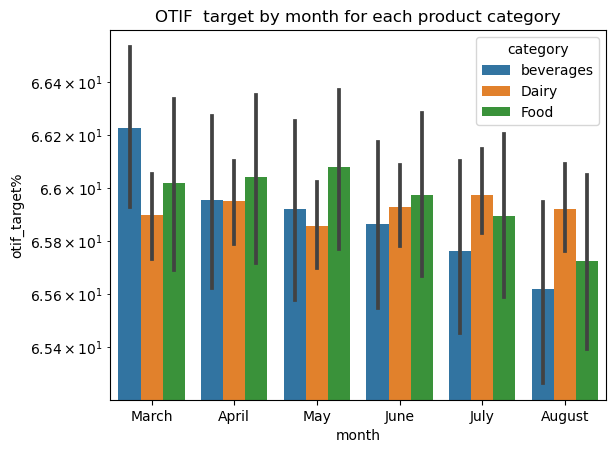

In [90]:
ax = sns.barplot(x="month", y="otif_target%", hue="category", data=df_fact_order_lines)
ax.set_yscale('log')
ax.set(title="OTIF  target by month for each product category")

Now we can compare these categories by months based on the OTIF target percentage